In [1]:
import cv2
import numpy as np
import os

In [2]:
data_real = os.listdir('training_real')
data_fake = os.listdir('training_fake')

### CNN

In [4]:
X = []
y = []

for i in data_real:
    img = cv2.imread('training_real/'+i)
    img = cv2.resize(img, (100, 100))
    X.append(img)
    y.append(1)

for i in data_fake:
    img = cv2.imread('training_fake/'+i)
    img = cv2.resize(img, (100, 100))
    X.append(img)
    y.append(0)

In [6]:
X = np.array(X)
y = np.array(y)

In [7]:
X.shape, y.shape

((2041, 100, 100, 3), (2041,))

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
51/51 [==============================] - 2s 29ms/step - loss: 2.9103 - accuracy: 0.4963 - val_loss: 0.7072 - val_accuracy: 0.4670
Epoch 2/50
51/51 [==============================] - 1s 26ms/step - loss: 0.6964 - accuracy: 0.5337 - val_loss: 0.6874 - val_accuracy: 0.5623
Epoch 3/50
51/51 [==============================] - 1s 26ms/step - loss: 0.6882 - accuracy: 0.5429 - val_loss: 0.6790 - val_accuracy: 0.5917
Epoch 4/50
51/51 [==============================] - 1s 26ms/step - loss: 0.6897 - accuracy: 0.5392 - val_loss: 0.6794 - val_accuracy: 0.6039
Epoch 5/50
51/51 [==============================] - 1s 25ms/step - loss: 0.6862 - accuracy: 0.5588 - val_loss: 0.6860 - val_accuracy: 0.5599
Epoch 6/50
51/51 [==============================] - 1s 25ms/step - loss: 0.6749 - accuracy: 0.5668 - val_loss: 0.6462 - val_accuracy: 0.6479
Epoch 7/50
51/51 [==============================] - 1s 26ms/step - loss: 0.6594 - accuracy: 0.6158 - val_loss: 0.6860 - val_accuracy: 0.5746
Epoch 8/50
51

13/13 [==============================] - 0s 7ms/step
Accuracy:  0.5672371638141809


<AxesSubplot: >

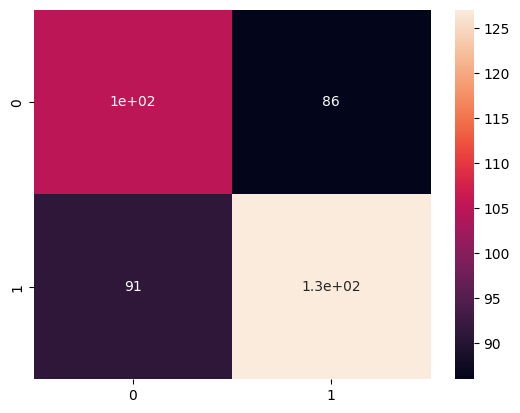

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
from seaborn import heatmap

y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

acc_cnn = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc_cnn)

cm_cnn = confusion_matrix(y_test, y_pred)
heatmap(cm_cnn, annot=True)

In [16]:
X = []
y = []

for i in data_real:
    img = cv2.imread('training_real/'+i)
    img = cv2.resize(img, (100, 100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.flatten()
    X.append(img)
    y.append(1)

for i in data_fake:
    img = cv2.imread('training_fake/'+i)
    img = cv2.resize(img, (100, 100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img.flatten()
    X.append(img)
    y.append(0)

X = np.array(X)
y = np.array(y)

In [17]:
X.shape, y.shape

((2041, 10000), (2041,))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

Accuracy:  0.6014669926650367


<AxesSubplot: >

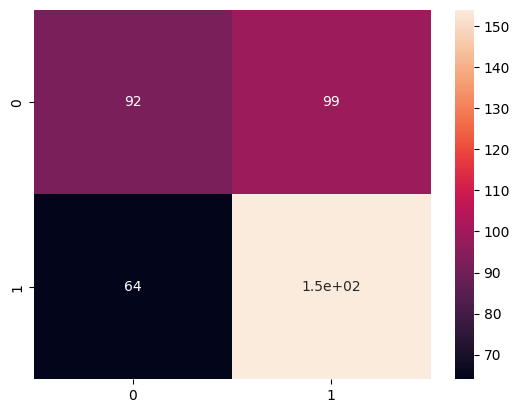

In [20]:
y_pred = rf.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc_rf)

cm_rf = confusion_matrix(y_test, y_pred)
heatmap(cm_rf, annot=True)

### Naive Bayes

In [21]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

Accuracy:  0.5721271393643031


<AxesSubplot: >

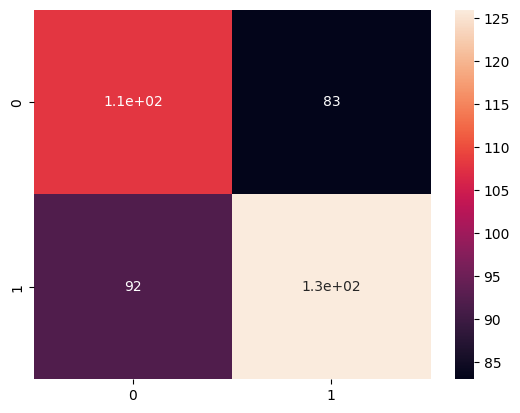

In [22]:
y_pred = nb.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc_nb)

cm_nb = confusion_matrix(y_test, y_pred)
heatmap(cm_nb, annot=True)

### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy:  0.5403422982885085


<AxesSubplot: >

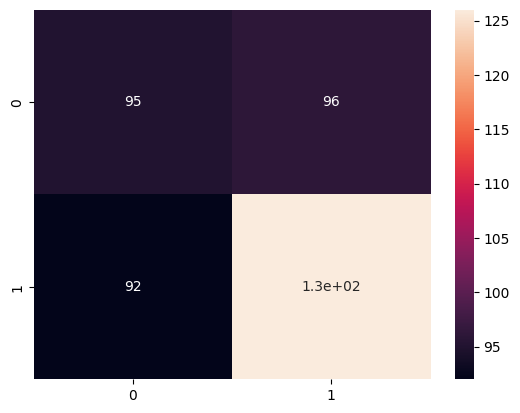

In [24]:
y_pred = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc_dt)

cm_dt = confusion_matrix(y_test, y_pred)
heatmap(cm_dt, annot=True)

### KNN

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy:  0.5281173594132029


<AxesSubplot: >

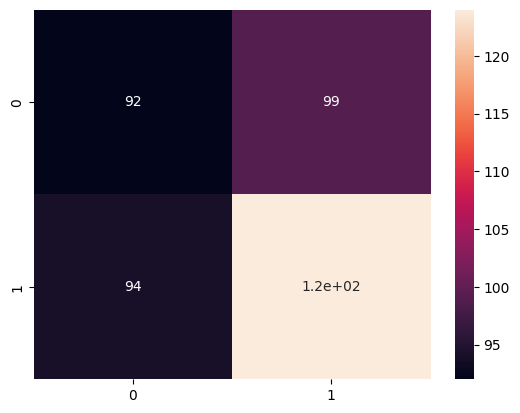

In [30]:
y_pred = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc_knn)

cm_knn = confusion_matrix(y_test, y_pred)
heatmap(cm_knn, annot=True)

### Comparison

<AxesSubplot: >

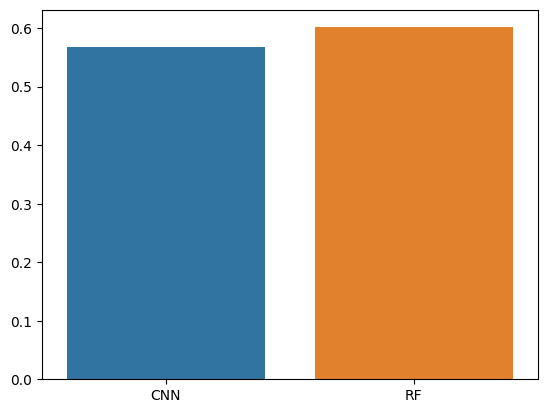

In [26]:
import seaborn as sns

# CNN vs RF
sns.barplot(x=['CNN', 'RF'], y=[acc_cnn, acc_rf])

<AxesSubplot: >

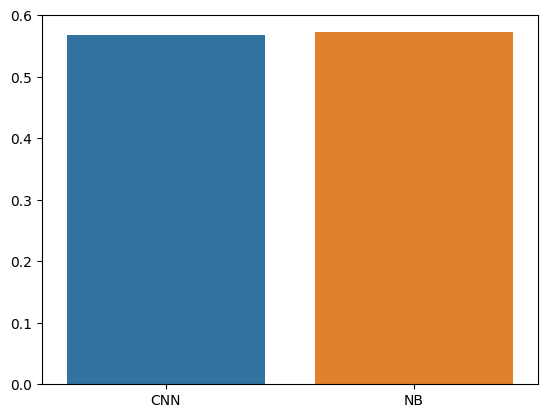

In [27]:
# CNN vs NB
sns.barplot(x=['CNN', 'NB'], y=[acc_cnn, acc_nb])

<AxesSubplot: >

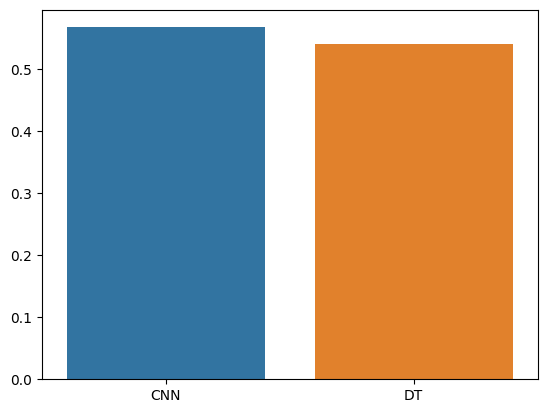

In [28]:
# CNN vs DT
sns.barplot(x=['CNN', 'DT'], y=[acc_cnn, acc_dt])

<AxesSubplot: >

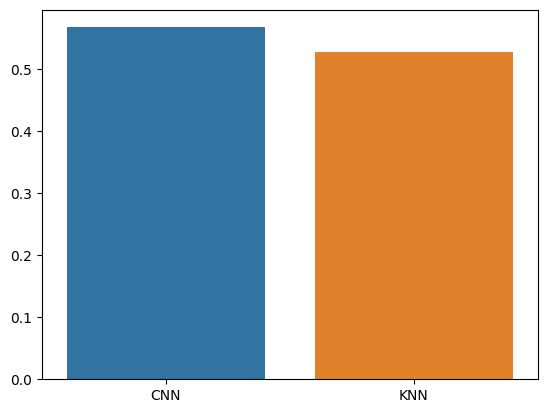

In [31]:
## CNN vs KNN
sns.barplot(x=['CNN', 'KNN'], y=[acc_cnn, acc_knn])